In [1]:
#Učitavamo neophodne biblioteke

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint


In [2]:
#Učitavamo dataset

esa = pd.read_csv("baza_v3.csv", sep=';',  index_col="Redni br.")
esa.head()

,BR,Pol,GodCent,Event,Time,EventCVI,EventIM,EventTu,RODJENJE,GODKraj,...,DG30_3,DG3,DG40,DG40_1,DG40_2,DG40_3,DG4,TIPHD,GODKraj.1,PL
Redni br.,,,,,,,,,,,,,,,,,,,,,
1,156,1,61.0,0,50.0,0.0,0.0,1.0,10.01.1934,65.0,...,0,Anaemia sec,4.0,0,0,0,Exitus letalis,BHD,65.0,M
2,166,1,29.0,0,17.0,0.0,0.0,0.0,13.05.1966,30.0,...,0,TBC,4.0,0,0,0,meningoencephalitis pneumococcida,AHD,30.0,M
3,287,2,53.0,0,149.0,0.0,1.0,0.0,28.05.1949,64.0,...,0,Insuff renum chr term,4.0,0,0,0,Anaemia sec,BHD,64.0,Z
4,350,1,63.0,0,139.0,0.0,0.0,0.0,27.10.1942,71.0,...,0,HBV,4.0,0,0,0,Stenocardia,BHD,71.0,M
5,372,2,52.0,0,74.0,0.0,0.0,0.0,30.10.1955,58.0,...,0,Hepatitis,4.0,0,0,0,Th Pegasys,HDF,58.0,Z


In [3]:
#Pregled podataka u Datasetu

esa.describe()

,BR,Pol,GodCent,Event,Time,EventCVI,EventIM,EventTu,GODKraj,HD_MES,...,DG20_3,DG30,DG30_1,DG30_2,DG30_3,DG40,DG40_1,DG40_2,DG40_3,GODKraj.1
count,439.000000,439.000000,437.000000,439.0,438.000000,438.000000,433.000000,433.000000,424.000000,437.000000,...,439.000000,432.000000,439.000000,439.000000,439.000000,400.000000,439.000000,439.000000,439.000000,424.000000
mean,225.785877,1.435080,50.377574,0.0,107.904110,0.109589,0.133949,0.136259,57.514151,90.803204,...,0.013667,3.888889,0.015945,0.041002,0.061503,3.815000,0.043280,0.018223,0.061503,57.405660
std,128.715217,0.496333,14.278255,0.0,136.086172,0.312734,0.340992,0.343460,13.731460,77.443070,...,0.202259,0.488063,0.125407,0.283737,0.425606,0.675957,0.203719,0.190255,0.425606,14.001708
min,2.000000,1.000000,17.000000,0.0,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,1.000000,39.000000,0.0,36.000000,0.000000,0.000000,0.000000,48.000000,31.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,48.000000
50%,227.000000,1.000000,51.000000,0.0,72.500000,0.000000,0.000000,0.000000,59.000000,66.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,59.000000
75%,336.500000,2.000000,62.000000,0.0,142.000000,0.000000,0.000000,0.000000,67.250000,133.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,67.250000
max,447.000000,2.000000,85.000000,0.0,1317.000000,1.000000,1.000000,1.000000,86.000000,418.000000,...,3.000000,4.000000,1.000000,2.000000,3.000000,4.000000,1.000000,2.000000,3.000000,86.000000


In [4]:
#Pregled kolona dataseta

esa.columns

Index(['BR', 'Pol', 'GodCent', 'Event', 'Time', 'EventCVI', 'EventIM',
       'EventTu', 'RODJENJE', 'GODKraj', 'HD_PRVA', 'HD_CENTAR', 'HD_MES',
       'HDKRAJ', 'DATHDKRAJ', 'ESA', 'Tu', 'MalTu', 'CCI', 'Dg', 'DG1', 'DG20',
       'DG20_2', 'DG20_3', 'DG2', 'DG30', 'DG30_1', 'DG30_2', 'DG30_3', 'DG3',
       'DG40', 'DG40_1', 'DG40_2', 'DG40_3', 'DG4', 'TIPHD', 'GODKraj.1',
       'PL'],
      dtype='object')

In [5]:
#Kolone sa tekstualnim podacima - dijagnozama pretvaramo u tip string
esa['DG1'] = esa["DG1"].astype(str)
esa['DG2'] = esa["DG2"].astype(str)
esa['DG3'] = esa["DG3"].astype(str)
esa['DG4'] = esa["DG4"].astype(str)
esa['HDKRAJ'] = esa["HDKRAJ"].astype(str)
esa["TIPHD"] = esa["TIPHD"].astype(str)

In [6]:
#Kopiramo dataset
#Brišemo kolone koje nisu od direktne važnosti za rad

esa_1 = esa.copy()
esa_1 = esa_1.drop(['BR','GodCent', 'Event', 'Time', 'RODJENJE', 'GODKraj',
                   'HD_PRVA', 'HD_CENTAR',"HDKRAJ", 'DATHDKRAJ', 'GODKraj.1', "PL"], axis=1)
esa_1[["HD_MES", "Tu", "MalTu"]].fillna(0)
esa_1['TIPHD'].fillna("NNN")
esa_1 = esa_1.dropna()

In [7]:
esa_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 439
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pol       391 non-null    int64  
 1   EventCVI  391 non-null    float64
 2   EventIM   391 non-null    float64
 3   EventTu   391 non-null    float64
 4   HD_MES    391 non-null    float64
 5   ESA       391 non-null    float64
 6   Tu        391 non-null    float64
 7   MalTu     391 non-null    float64
 8   CCI       391 non-null    float64
 9   Dg        391 non-null    float64
 10  DG1       391 non-null    object 
 11  DG20      391 non-null    float64
 12  DG20_2    391 non-null    int64  
 13  DG20_3    391 non-null    int64  
 14  DG2       391 non-null    object 
 15  DG30      391 non-null    float64
 16  DG30_1    391 non-null    int64  
 17  DG30_2    391 non-null    int64  
 18  DG30_3    391 non-null    int64  
 19  DG3       391 non-null    object 
 20  DG40      391 non-null    float6

In [8]:
#Posmatramo vrednosti u koloni sa navedenom terapijom

esa_1["ESA"].value_counts()

1.0    219
0.0    172
Name: ESA, dtype: int64

In [9]:
#Izdvajamo redove sa podacima gde je primenjena ESA terapija

esa_2 = esa_1[esa_1["ESA"] == 1.0]

In [10]:
#Posmatramo podatke iz filtriranog dela dataseta koji je od interesa za analizu

esa_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 3 to 435
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pol       219 non-null    int64  
 1   EventCVI  219 non-null    float64
 2   EventIM   219 non-null    float64
 3   EventTu   219 non-null    float64
 4   HD_MES    219 non-null    float64
 5   ESA       219 non-null    float64
 6   Tu        219 non-null    float64
 7   MalTu     219 non-null    float64
 8   CCI       219 non-null    float64
 9   Dg        219 non-null    float64
 10  DG1       219 non-null    object 
 11  DG20      219 non-null    float64
 12  DG20_2    219 non-null    int64  
 13  DG20_3    219 non-null    int64  
 14  DG2       219 non-null    object 
 15  DG30      219 non-null    float64
 16  DG30_1    219 non-null    int64  
 17  DG30_2    219 non-null    int64  
 18  DG30_3    219 non-null    int64  
 19  DG3       219 non-null    object 
 20  DG40      219 non-null    float6

In [11]:
#Koristimo klasu lebelEncoder-a za rad sa više kolona

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        #Transforms columns of X specified in self.columns using
        #LabelEncoder(). If no columns specified, transforms all
        #columns in X.
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [12]:
#Vršimo trasnformaciju tekstualnih (kolona sa dijagnozama) u numeričke, kako bi mogli da ih 
#koristimo za rad
 
transforming_data = MultiColumnLabelEncoder(columns = ['DG1', 'DG2', 'DG3', 'DG4', "TIPHD"]).fit_transform(esa_2)
transforming_data.head()

,Pol,EventCVI,EventIM,EventTu,HD_MES,ESA,Tu,MalTu,CCI,Dg,...,DG30_1,DG30_2,DG30_3,DG3,DG40,DG40_1,DG40_2,DG40_3,DG4,TIPHD
Redni br.,,,,,,,,,,,,,,,,,,,,,
3,2,0.0,1.0,0.0,135.0,1.0,0.0,0.0,5.0,9.0,...,0,0,0,39,4.0,0,0,0,4,1
5,2,0.0,0.0,0.0,59.0,1.0,0.0,0.0,5.0,3.0,...,0,0,0,31,4.0,0,0,0,78,2
7,2,0.0,0.0,0.0,122.0,1.0,0.0,0.0,3.0,1.0,...,0,0,0,62,4.0,0,0,0,43,1
8,1,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,8.0,...,0,0,0,47,4.0,0,0,0,100,2
10,1,0.0,0.0,0.0,43.0,1.0,0.0,0.0,5.0,5.0,...,0,0,0,16,4.0,0,0,0,82,2


In [13]:
transforming_data.columns

Index(['Pol', 'EventCVI', 'EventIM', 'EventTu', 'HD_MES', 'ESA', 'Tu', 'MalTu',
       'CCI', 'Dg', 'DG1', 'DG20', 'DG20_2', 'DG20_3', 'DG2', 'DG30', 'DG30_1',
       'DG30_2', 'DG30_3', 'DG3', 'DG40', 'DG40_1', 'DG40_2', 'DG40_3', 'DG4',
       'TIPHD'],
      dtype='object')

In [14]:
#Izdvajamo kolone koje ćemo koristiti u Random Forest algoritmu

final_data = transforming_data[['Pol', 'HD_MES', 'EventCVI', 'EventIM', 'EventTu',
                                'Tu', 'MalTu', 'CCI', 'Dg','DG1', 'DG20', 'DG20_2', 
                                'DG20_3', 'DG2', 'DG30', 'DG30_1', 'DG30_2','DG30_3', 
                                'DG3', 'DG40', 'DG40_1', 'DG40_2', 'DG40_3', 'DG4', 
                                'TIPHD']]
final_data.head()

,Pol,HD_MES,EventCVI,EventIM,EventTu,Tu,MalTu,CCI,Dg,DG1,...,DG30_1,DG30_2,DG30_3,DG3,DG40,DG40_1,DG40_2,DG40_3,DG4,TIPHD
Redni br.,,,,,,,,,,,,,,,,,,,,,
3,2,135.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,19,...,0,0,0,39,4.0,0,0,0,4,1
5,2,59.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,26,...,0,0,0,31,4.0,0,0,0,78,2
7,2,122.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,11,...,0,0,0,62,4.0,0,0,0,43,1
8,1,34.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,32,...,0,0,0,47,4.0,0,0,0,100,2
10,1,43.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,9,...,0,0,0,16,4.0,0,0,0,82,2


In [15]:
final_data["DG30_2"].value_counts()

0    211
2      8
Name: DG30_2, dtype: int64

In [16]:
transforming_data["DG30"].value_counts()

4.0    203
2.0      8
1.0      4
3.0      4
Name: DG30, dtype: int64

In [17]:
#Određujemo lebel i atribute

y_var = final_data["DG30_3"]
x_var = final_data[['Pol', 'HD_MES', 'EventCVI', 'EventIM', 'EventTu','Tu', 
                    'MalTu', 'CCI', 'Dg', 'DG1', 'DG20','DG20_2', 'DG20_3', 
                    'DG2', 'DG30', 'DG40_1', 'DG40_2', 'DG40_3', 'DG4', 'TIPHD']]

### Rendom forest Classifier

In [18]:
#Train test split podela dataseta

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(175, 20) (175,)
(44, 20) (44,)


In [23]:
#Primenjujemo RandomForestClassifier sa nekoliko estimatora kako bi dobili što bolji rezultat

rezultat_rfc = {}
estimators = [100, 150, 200, 250, 300]
for item in estimators:
    rf = RandomForestClassifier(n_estimators=item)
    model_rfc = rf.fit(X_train, y_train)
    rezultat_rfc[item] = (model_rfc.score(X_test, y_test))


prikaz = pd.DataFrame.from_dict(rezultat_rfc, orient='index').rename(columns={0: 'Rezultat RFC'})
prikaz_rezultat_rfc = prikaz.sort_values(by="Rezultat RFC", ascending=False)
prikaz_rezultat_rfc

,Rezultat RFC
100,0.977273
150,0.977273
200,0.977273
250,0.977273
300,0.977273


In [19]:
rfc = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100)
model_rfc = rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

0.9772727272727273

In [20]:
# Make predictions
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)
train_predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
#y_test

In [26]:
y_pred = gbc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Ostvareni rezultati'], colnames=['Prognozirani razultati'])

Prognozirani razultati,0,3
Ostvareni rezultati,,
0,43,0
3,0,1


In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
#Koristimo GradientBoostingClassifier za finu optimizaciju rezultata.
#GradientBoostingClassifier se koristi kod  metoda klasifikacije

gbc = GradientBoostingClassifier()
model_rfc_gbc = gbc.fit(X_train, y_train)
model_rfc_gbc.score(X_test, y_test)

1.0

In [35]:
#crossvalidation
hyperparameters = {
                   "max_depth": randint(3, 6),
                   "max_features": randint(1, 10),
                   "min_samples_leaf": randint(1, 10)
                  }

In [36]:
clf = RandomizedSearchCV(model_rfc, hyperparameters, cv=4)
clf.fit(X_train, y_train)

print("GB Score after CV: %s" % clf.score(X_test, y_test))

C:\Users\Filip\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


GB Score after CV: 0.9772727272727273


In [30]:
m_rfc = model_rfc.feature_importances_
m_rfc

array([2.18205631e-02, 1.27663668e-01, 4.19498921e-03, 6.10642977e-02,
       2.95501883e-02, 2.79867054e-02, 5.63217826e-03, 1.12119121e-01,
       8.52836002e-02, 4.71327683e-02, 2.89286770e-04, 0.00000000e+00,
       7.17867433e-05, 6.37330908e-02, 2.45843571e-01, 7.97817313e-04,
       0.00000000e+00, 1.56769579e-04, 8.97809526e-02, 7.68786461e-02])

In [31]:
col = ['Pol', 'HD_MES', 'EventCVI', 'EventIM', 'EventTu','Tu', 'MalTu', 'CCI', 
       'Dg', 'DG1', 'DG20','DG20_2', 'DG20_3', 'DG2', 'DG40', 'DG40_1', 'DG40_2',
       'DG40_3', 'DG4', 'TIPHD']

In [32]:
uticaj_rfc_DG40_1 = pd.DataFrame({"Najbitnije karakteristike": col, "Izmeren uticaj": m_rfc} )
uticaj_rfc_DG40_1.sort_values("Izmeren uticaj", ascending = False).head(15)

,Najbitnije karakteristike,Izmeren uticaj
14,DG40,0.245844
1,HD_MES,0.127664
7,CCI,0.112119
18,DG4,0.089781
8,Dg,0.085284
19,TIPHD,0.076879
13,DG2,0.063733
3,EventIM,0.061064
9,DG1,0.047133
4,EventTu,0.029550


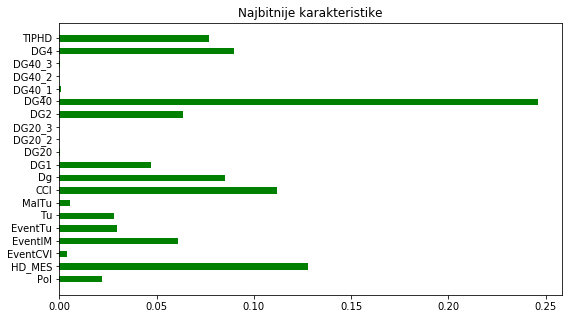

<Figure size 720x720 with 0 Axes>

In [33]:
y_rfc = model_rfc.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.5 
ind = np.arange(len(y_rfc)) 
ax.barh(ind, y_rfc, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Najbitnije karakteristike')
plt.figure(figsize=(10,10))
fig.set_size_inches(9, 5, forward=True)
plt.show()